In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

In [2]:
# 设置字体为 SimHei（黑体），或者其他支持中文的字体
plt.rcParams['font.sans-serif'] = ['SimHei']  # 设置字体
plt.rcParams['axes.unicode_minus'] = False  # 正常显示负号

In [3]:
# 获取当前文件所在目录的父目录
import os
import sys

current_dir = os.getcwd()
parent_dir = os.path.dirname(current_dir)

if parent_dir not in sys.path:
    sys.path.append(parent_dir)


from Dtool import fill_missing_values, plot_factors_by_pattern, plot_comparison_multiple, reverse_column, plot_feature_importance,plot_predictions


In [4]:
sheet = pd.read_excel('data_input/油制PP期货价格.xlsx', sheet_name='Sheet1').rename(columns={'DataTime': 'Date'})
sheet = sheet.set_index('Date')
last_day = sheet['PP期货价格'].last_valid_index()                        

future_data_30days = sheet[sheet.index > last_day]
target_days = pd.date_range(start=last_day+ pd.DateOffset(1), periods=30, freq='B')
target_end = target_days[-1]
new_index = pd.date_range(start=last_day+ pd.DateOffset(1), end=target_end, freq='B')
sheet = sheet.reindex(sheet.index.union(new_index))
sheet = sheet[sheet.index <= target_end]

sheet.tail()


,油制PP盘面利润,PP期货价格,油制PP盘面成本,中间价：美元兑人民币,期货收盘价（连续）：布伦特原油,油制PP盘面利润拟合残差/WTI原油期货价格,WTI原油期货价格
2025-12-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2025-12-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2025-12-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2025-12-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2025-12-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
file_path4 = os.path.expanduser("eta/油制PP盘面利润拟合残差-WTI原油期货价格_合并数据.xlsx") 
sheet4 = pd.ExcelFile(file_path4).parse('Sheet1')
sheet4['Date'] = pd.to_datetime(sheet4['Date'], errors='coerce')
sheet4 = sheet4.drop(columns=['真实值'])
sheet4 = sheet4.dropna()

sheet4 = sheet4.sort_values('Date', ascending=True)
sheet4.tail()

,Date,预测值
4,2025-12-01,-443.4
3,2025-12-02,-443.4
2,2025-12-03,-481.1
1,2025-12-04,-428.5
0,2025-12-05,-388.2


In [6]:
# 尝试多个可能的文件路径
file_paths = [
    os.path.expanduser("~/Desktop/X-BASE/宏观经济/eta/USDCNY即期汇率_合并数据.xlsx"),
    os.path.expanduser("~/Desktop/弘则研究/Horizon-Insights/X-base/宏观经济/eta/USDCNY即期汇率_合并数据.xlsx"),
    os.path.expanduser("~/Downloads/hongze/宏观经济/eta/USDCNY即期汇率_合并数据.xlsx")
]
'''
file_paths = [
    os.path.expanduser("~/Desktop/X-BASE/宏观经济/eta/人民币汇率收盘价_合并数据.xlsx"),
    os.path.expanduser("~/Desktop/弘则研究/Horizon-Insights/X-base/宏观经济/eta/人民币汇率收盘价_合并数据.xlsx")
]
'''
file_path = None
for path in file_paths:
    if os.path.isfile(path):  # 确保是文件而不是目录
        file_path = path
        break

if file_path is None:
    raise FileNotFoundError("未找到数据文件")

try:
    sheet1 = pd.read_excel(file_path, sheet_name='Sheet1')
    sheet1['Date'] = pd.to_datetime(sheet1['Date'], errors='coerce')
    sheet1 = sheet1.drop(columns=['真实值'])
    sheet1 = sheet1.dropna()
    sheet1 = sheet1.sort_values('Date', ascending=True)
    sheet1.head()
except Exception as e:
    raise Exception(f"读取文件时出错: {str(e)}")

In [7]:
# 尝试多个可能的文件路径
file_paths2 = [
    os.path.expanduser("~/Desktop/X-BASE/wti模型3.0/eta/wti_合并数据.xlsx"),    
    os.path.expanduser("~/Desktop/弘则研究/Horizon-Insights/X-base/wti模型3.0/eta/wti_合并数据.xlsx"),
    os.path.expanduser("~/Downloads/hongze/wti模型3.0/eta/wti_合并数据.xlsx")
]

file_path2 = None
for path in file_paths2:
    if os.path.isfile(path):  # 确保是文件而不是目录
        file_path2 = path
        break

if file_path2 is None:
    raise FileNotFoundError("未找到数据文件")

try:
    sheet2 = pd.read_excel(file_path2, sheet_name='Sheet1')
    sheet2['Date'] = pd.to_datetime(sheet2['Date'], errors='coerce')
    sheet2 = sheet2.drop(columns=['wti原油期货价格'])
    sheet2 = sheet2.dropna()
    sheet2 = sheet2.sort_values('Date', ascending=True)
    sheet2.head()
except Exception as e:
    raise Exception(f"读取文件时出错: {str(e)}")

In [8]:
# 尝试多个可能的文件路径
file_paths3 = [
    os.path.expanduser("~/Desktop/X-BASE/wti模型3.0/eta/Brent原油价格_合并数据.xlsx"),   
    os.path.expanduser("~/Desktop/弘则研究/Horizon-Insights/X-base/wti模型3.0/eta/Brent原油价格_合并数据.xlsx"),
    os.path.expanduser("~/Downloads/hongze/wti模型3.0/eta/Brent原油价格_合并数据.xlsx")
]

file_path3 = None
for path in file_paths3:
    if os.path.isfile(path):  # 确保是文件而不是目录
        file_path3 = path   
        break

if file_path3 is None:
    raise FileNotFoundError("未找到数据文件")

try:
    sheet3 = pd.read_excel(file_path3, sheet_name='Sheet1')
    sheet3['Date'] = pd.to_datetime(sheet3['Date'], errors='coerce')
    sheet3 = sheet3.drop(columns=['布伦特原油期货价格'])
    sheet3 = sheet3.dropna()
    sheet3 = sheet3.sort_values('Date', ascending=True)
    sheet3.head()
except Exception as e:
    raise Exception(f"读取文件时出错: {str(e)}")

In [9]:
sheet.columns

Index(['油制PP盘面利润', 'PP期货价格', '油制PP盘面成本', '中间价：美元兑人民币', '期货收盘价（连续）：布伦特原油',
       '油制PP盘面利润拟合残差/WTI原油期货价格', 'WTI原油期货价格'],
      dtype='object')

In [10]:
# 合并 sheet1 和 sheet2 的数据到 sheet
sheet_daily = sheet.copy()
sheet_daily.index.name = 'Date'
sheet_daily = sheet_daily.reset_index()

# 合并 sheet1 的美国10年通胀预期数据
sheet_daily = pd.merge(
    sheet_daily,
    sheet1[['Date', '预测值']],
    on='Date',
    how='left'
)
sheet_daily['中间价：美元兑人民币'] = sheet_daily['中间价：美元兑人民币'].fillna(sheet_daily['预测值'])
sheet_daily = sheet_daily.drop(columns=['预测值'])

# 合并 sheet2 的美元指数数据 
sheet_daily = pd.merge(
    sheet_daily,
    sheet2[['Date', 'WTI原油期货价格预测']],
    on='Date',
    how='left'
)
sheet_daily['WTI原油期货价格'] = sheet_daily['WTI原油期货价格'].fillna(sheet_daily['WTI原油期货价格预测'])
sheet_daily = sheet_daily.drop(columns=['WTI原油期货价格预测'])

# sheet 3
sheet_daily = pd.merge(
    sheet_daily,
    sheet3[['Date', 'Brent原油期货价格预测']],
    on='Date',
    how='left'
)
sheet_daily['期货收盘价（连续）：布伦特原油'] = sheet_daily['期货收盘价（连续）：布伦特原油'].fillna(sheet_daily['Brent原油期货价格预测'])
sheet_daily = sheet_daily.drop(columns=['Brent原油期货价格预测'])

# sheet 4
sheet_daily = pd.merge(
    sheet_daily,
    sheet4[['Date', '预测值']],
    on='Date',
    how='left'
)
sheet_daily['油制PP盘面利润拟合残差/WTI原油期货价格'] = sheet_daily['油制PP盘面利润拟合残差/WTI原油期货价格'].fillna(sheet_daily['预测值'])
sheet_daily = sheet_daily.drop(columns=['预测值'])

sheet_daily = sheet_daily[sheet_daily['Date'] >= pd.Timestamp('2023-01-01')]
sheet_daily.tail(10)

,Date,油制PP盘面利润,PP期货价格,油制PP盘面成本,中间价：美元兑人民币,期货收盘价（连续）：布伦特原油,油制PP盘面利润拟合残差/WTI原油期货价格,WTI原油期货价格
8939,2025-12-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8940,2025-12-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8941,2025-12-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8942,2025-12-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8943,2025-12-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8944,2025-12-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8945,2025-12-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8946,2025-12-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8947,2025-12-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8948,2025-12-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
# 添加新列 主焦煤价格/临汾_预测
sheet_daily['油制PP盘面利润_预测'] = -48.7325*sheet_daily['WTI原油期货价格']+ 3677.9818 + sheet_daily['油制PP盘面利润拟合残差/WTI原油期货价格']
sheet_daily.tail(10)


,Date,油制PP盘面利润,PP期货价格,油制PP盘面成本,中间价：美元兑人民币,期货收盘价（连续）：布伦特原油,油制PP盘面利润拟合残差/WTI原油期货价格,WTI原油期货价格,油制PP盘面利润_预测
8939,2025-12-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8940,2025-12-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8941,2025-12-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8942,2025-12-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8943,2025-12-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8944,2025-12-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8945,2025-12-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8946,2025-12-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8947,2025-12-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8948,2025-12-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
 


sheet_daily['油制PP盘面成本_预测'] = ((sheet_daily['期货收盘价（连续）：布伦特原油'] + 4) * 7 * sheet_daily['中间价：美元兑人民币'] * 1.13 + 600 + 85) * 1.3 + 500
sheet_daily['PP期货价格_预测'] = sheet_daily['油制PP盘面利润_预测'] + sheet_daily['油制PP盘面成本_预测']


last_day = sheet_daily['Date'][sheet_daily['PP期货价格'].last_valid_index()]   
sheet_daily = sheet_daily.dropna(subset=['PP期货价格_预测'])
sheet_daily.tail(10)

,Date,油制PP盘面利润,PP期货价格,油制PP盘面成本,中间价：美元兑人民币,期货收盘价（连续）：布伦特原油,油制PP盘面利润拟合残差/WTI原油期货价格,WTI原油期货价格,油制PP盘面利润_预测,油制PP盘面成本_预测,PP期货价格_预测
8929,2025-11-24,NaN,NaN,NaN,7.1400,64.47,-453.8,61.18,242.727450,6417.609851,6660.337301
8930,2025-11-25,NaN,NaN,NaN,7.1401,64.91,-430.4,61.58,246.634450,6449.985784,6696.620234
8931,2025-11-26,NaN,NaN,NaN,7.1377,64.79,-433.5,61.52,246.458400,6439.477504,6685.935904
8932,2025-11-27,NaN,NaN,NaN,7.1376,64.60,-480.2,61.33,209.017575,6425.461539,6634.479114
8933,2025-11-28,NaN,NaN,NaN,7.1376,65.62,-480.2,60.96,227.048600,6500.325398,6727.373998
8934,2025-12-01,NaN,NaN,NaN,7.1319,65.95,-443.4,61.36,244.355600,6520.446073,6764.801673
8935,2025-12-02,NaN,NaN,NaN,7.1318,66.09,-443.4,61.48,238.507700,6530.641225,6769.148925
8936,2025-12-03,NaN,NaN,NaN,7.1246,66.69,-481.1,62.07,172.055525,6569.409287,6741.464812
8937,2025-12-04,NaN,NaN,NaN,7.1246,66.63,-428.5,61.99,228.554125,6565.013551,6793.567676
8938,2025-12-05,NaN,NaN,NaN,7.1244,65.18,-388.2,60.53,340.003575,6458.640996,6798.644571


---

In [13]:
# 创建历史数据部分
historical = sheet_daily[sheet_daily['Date'] <= last_day][['Date', 'PP期货价格']]
historical.columns = ['Date', 'PP期货价格']

# 创建预测数据部分 
forecast = sheet_daily[sheet_daily['Date'] > last_day][['Date', 'PP期货价格_预测']]
forecast.columns = ['Date', 'PP期货价格_预测']


# 合并历史和预测数据
merged_df_daily = pd.concat([historical, forecast], axis=0, join='outer')
merged_df_daily = merged_df_daily.sort_values('Date').reset_index(drop=True)
merged_df_daily = merged_df_daily.sort_values(by='Date', ascending=False)
merged_df_daily['Date'] = merged_df_daily['Date'].dt.strftime('%Y/%m/%d')


merged_df_daily.to_excel('eta/PP期货价格_合并数据.xlsx', index=False,float_format='%.6f')
merged_df_daily.head()

,Date,PP期货价格,PP期货价格_预测
686,2025/12/05,NaN,6798.644571
685,2025/12/04,NaN,6793.567676
684,2025/12/03,NaN,6741.464812
683,2025/12/02,NaN,6769.148925
682,2025/12/01,NaN,6764.801673


In [14]:
# 创建历史数据部分
historical_pf = sheet_daily[sheet_daily['Date'] <= last_day][['Date', '油制PP盘面利润']]
historical_pf.columns = ['Date', '油制PP盘面利润']

# 创建预测数据部分 
forecast_pf = sheet_daily[sheet_daily['Date'] > last_day][['Date', '油制PP盘面利润_预测']]
forecast_pf.columns = ['Date', '油制PP盘面利润_预测']


# 合并历史和预测数据
merged_df_daily_pf = pd.concat([historical_pf, forecast_pf], axis=0, join='outer')
merged_df_daily_pf = merged_df_daily_pf.sort_values('Date').reset_index(drop=True)
merged_df_daily_pf = merged_df_daily_pf.sort_values(by='Date', ascending=False)
merged_df_daily_pf['Date'] = merged_df_daily_pf['Date'].dt.strftime('%Y/%m/%d')


merged_df_daily_pf.to_excel('eta/油制PP盘面利润_合并数据.xlsx', index=False,float_format='%.6f')
merged_df_daily_pf.head()

,Date,油制PP盘面利润,油制PP盘面利润_预测
686,2025/12/05,NaN,340.003575
685,2025/12/04,NaN,228.554125
684,2025/12/03,NaN,172.055525
683,2025/12/02,NaN,238.507700
682,2025/12/01,NaN,244.355600


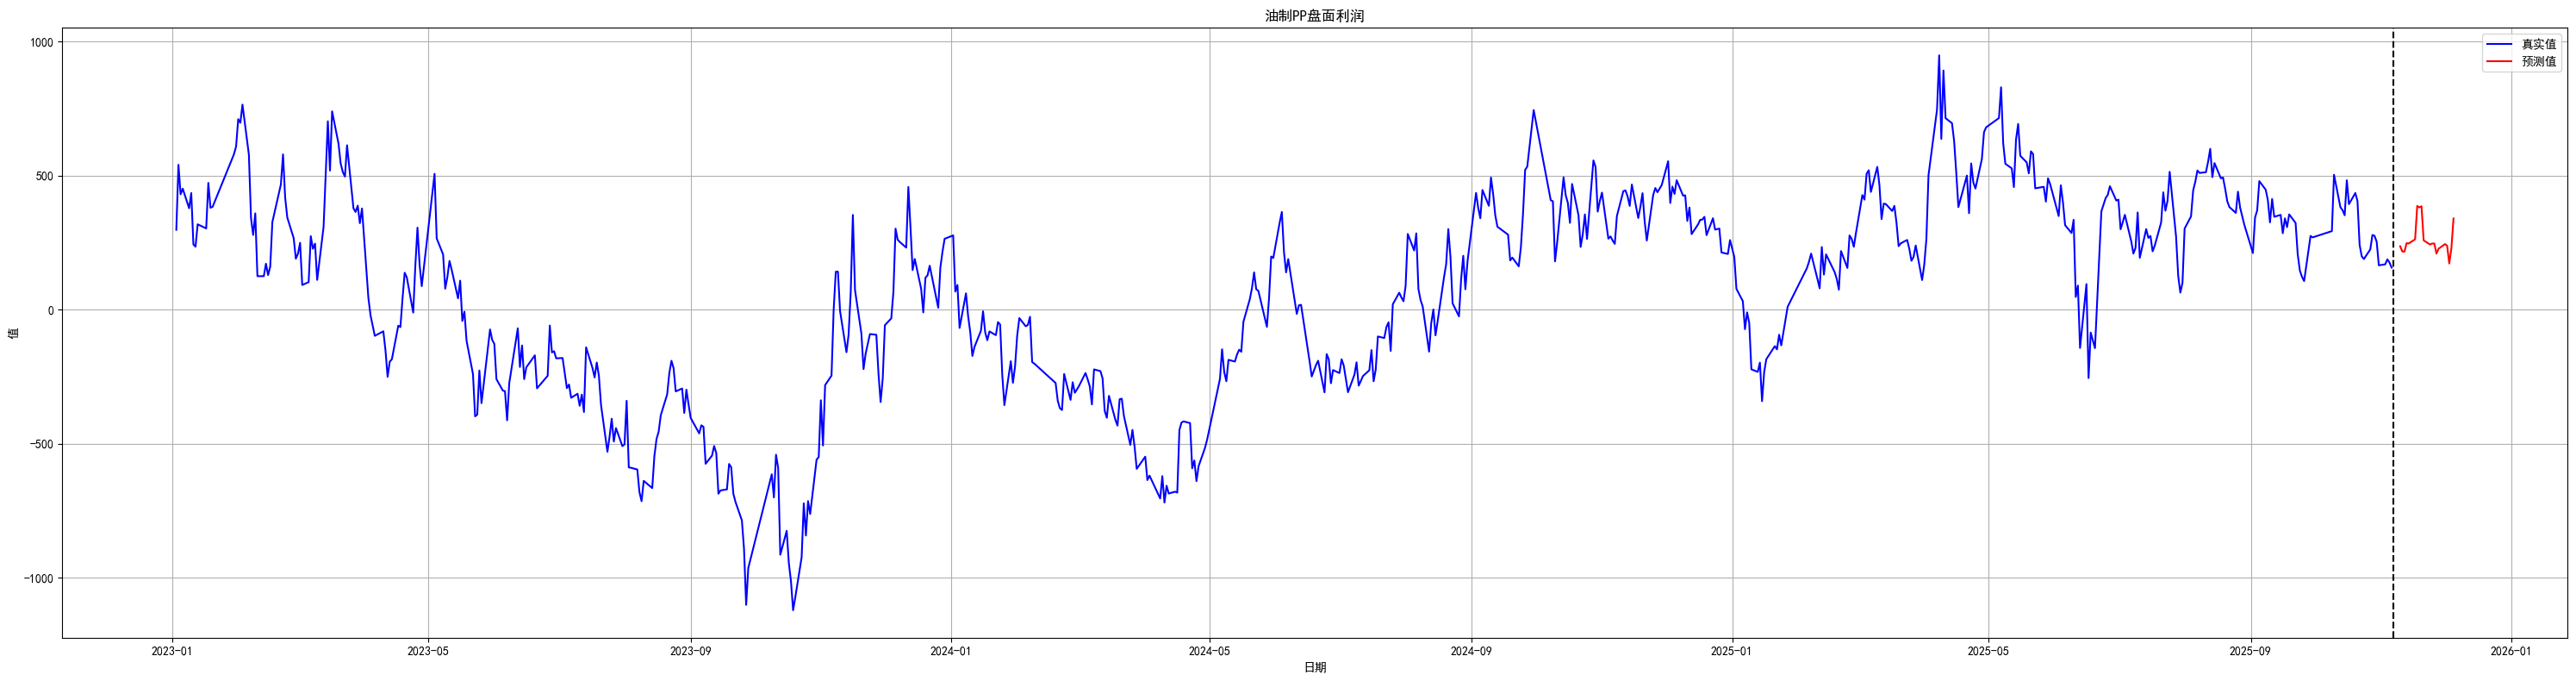

In [15]:
# 设置图形大小
plt.figure(figsize=(30, 8))

merged_df_daily_plot_pf = merged_df_daily_pf.copy()
merged_df_daily_plot_pf['Date'] = pd.to_datetime(merged_df_daily_plot_pf['Date'])

# 绘制真实值曲线(蓝色)
plt.plot(merged_df_daily_plot_pf['Date'], merged_df_daily_plot_pf['油制PP盘面利润'], color='blue', label='真实值')
plt.plot(merged_df_daily_plot_pf['Date'], merged_df_daily_plot_pf['油制PP盘面利润_预测'], color='red', label='预测值')

avline_date = pd.to_datetime(last_day)
plt.axvline(x=avline_date, color='black', linestyle='--')

# 设置图例
plt.legend()

# 设置标题和标签
plt.title('油制PP盘面利润')
plt.xlabel('日期')
plt.ylabel('值')
plt.grid(True)
plt.tight_layout()
plt.show()

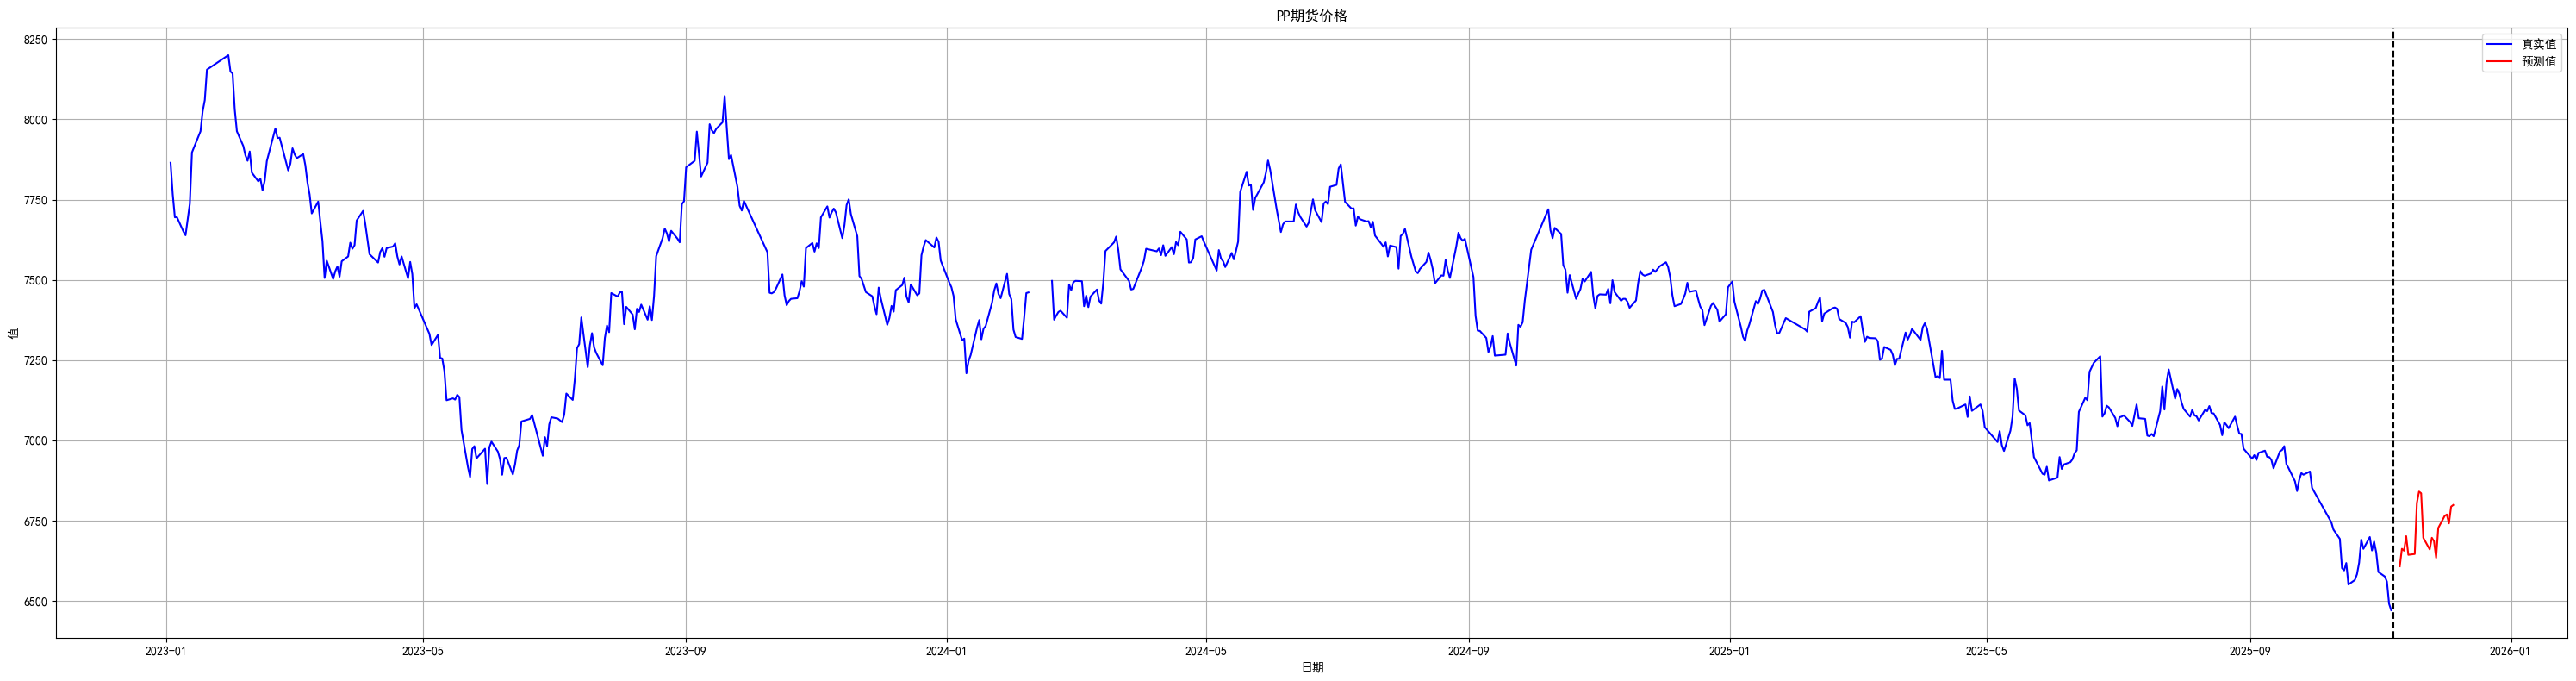

In [16]:
# 设置图形大小
plt.figure(figsize=(30, 8))

merged_df_daily_plot = merged_df_daily.copy()
merged_df_daily_plot['Date'] = pd.to_datetime(merged_df_daily_plot['Date'])

# 绘制真实值曲线(蓝色)
plt.plot(merged_df_daily_plot['Date'], merged_df_daily_plot['PP期货价格'], color='blue', label='真实值')
plt.plot(merged_df_daily_plot['Date'], merged_df_daily_plot['PP期货价格_预测'], color='red', label='预测值')

avline_date = pd.to_datetime(last_day)
plt.axvline(x=avline_date, color='black', linestyle='--')

# 设置图例
plt.legend()

# 设置标题和标签
plt.title('PP期货价格')
plt.xlabel('日期')
plt.ylabel('值')
plt.grid(True)
plt.tight_layout()
plt.show()

In [17]:
# 创建历史数据部分
historical_monthly_pf = sheet_daily[sheet_daily['Date'] <= last_day][['Date', '油制PP盘面利润']]
historical_monthly_pf.columns = ['Date', '油制PP盘面利润']

# 创建预测数据部分 
forecast_monthly_pf = sheet_daily[sheet_daily['Date'] >= pd.Timestamp('2024-10-01')][['Date', '油制PP盘面利润_预测']]
forecast_monthly_pf.columns = ['Date', '油制PP盘面利润_预测']

merged_df_monthly_pf = pd.merge(historical_monthly_pf, forecast_monthly_pf, on='Date', how='outer')
merged_df_monthly_pf.set_index('Date', inplace=True)
merged_df_monthly_pf = merged_df_monthly_pf.resample('ME').mean()
merged_df_monthly_pf.reset_index(inplace=True)
merged_df_monthly_pf =merged_df_monthly_pf.sort_values('Date', ascending=False)
merged_df_monthly_pf['Date'] = merged_df_monthly_pf['Date'].dt.strftime('%Y/%m/%d')
# 将数值列保留2位小数
merged_df_monthly_pf['油制PP盘面利润'] = merged_df_monthly_pf['油制PP盘面利润'].round(2)
merged_df_monthly_pf['油制PP盘面利润_预测'] = merged_df_monthly_pf['油制PP盘面利润_预测'].round(2)

merged_df_monthly_pf.to_excel('eta/油制PP盘面利润_月度数据.xlsx', index=False,float_format= '%.4f')            
merged_df_monthly_pf

,Date,油制PP盘面利润,油制PP盘面利润_预测
35,2025/12/31,NaN,244.70
34,2025/11/30,172.15,247.08
33,2025/10/31,320.13,319.11
32,2025/09/30,306.37,305.53
31,2025/08/31,446.18,445.35
30,2025/07/31,284.78,284.08
29,2025/06/30,222.23,221.55
28,2025/05/31,560.72,559.78
27,2025/04/30,566.12,565.24
26,2025/03/31,343.16,342.50


In [18]:
# 创建历史数据部分
historical_monthly = sheet_daily[sheet_daily['Date'] <= last_day][['Date', 'PP期货价格']]
historical_monthly.columns = ['Date', 'PP期货价格']

# 创建预测数据部分 
forecast_monthly = sheet_daily[sheet_daily['Date'] >= pd.Timestamp('2024-10-01')][['Date', 'PP期货价格_预测']]
forecast_monthly.columns = ['Date', 'PP期货价格_预测']

merged_df_monthly = pd.merge(historical_monthly, forecast_monthly, on='Date', how='outer')
merged_df_monthly.set_index('Date', inplace=True)
merged_df_monthly = merged_df_monthly.resample('ME').mean()
merged_df_monthly.reset_index(inplace=True)
merged_df_monthly =merged_df_monthly.sort_values('Date', ascending=False)
merged_df_monthly['Date'] = merged_df_monthly['Date'].dt.strftime('%Y/%m/%d')
# 将数值列保留2位小数
merged_df_monthly['PP期货价格'] = merged_df_monthly['PP期货价格'].round(1)
merged_df_monthly['PP期货价格_预测'] = merged_df_monthly['PP期货价格_预测'].round(1)

merged_df_monthly.to_excel('eta/PP期货价格_月度数据.xlsx', index=False,float_format= '%.4f')            
merged_df_monthly

,Date,PP期货价格,PP期货价格_预测
35,2025/12/31,NaN,6773.5
34,2025/11/30,6524.5,6662.8
33,2025/10/31,6642.8,6641.8
32,2025/09/30,6924.3,6923.4
31,2025/08/31,7061.2,7060.4
30,2025/07/31,7089.9,7089.2
29,2025/06/30,7051.3,7050.6
28,2025/05/31,7013.2,7012.2
27,2025/04/30,7169.5,7168.6
26,2025/03/31,7303.4,7302.7


---

In [19]:
from Dcel import update_excel_data
# 使用示例
file_path = "eta/1.聚丙烯_数据上传.xlsx"
sheet_name = "日度数据表"
identifier = "油制PP盘面利润"

# 调用函数更新数据
success = update_excel_data(merged_df_daily_pf, file_path, sheet_name, identifier)

if success:
    print("数据已成功更新到Excel文件")
else:
    print("数据更新失败，请检查错误信息")

成功更新 日度数据表 中的数据
数据已成功更新到Excel文件


In [20]:
from Lcel import update_excel_data
file_path = "eta/1.聚丙烯_数据上传.xlsx"
sheet_name = "详情页"
identifier = "油制PP盘面利润"       # NEW: 新增日期标识符列的抬头
# 调用函数更新数据
success = update_excel_data(merged_df_monthly_pf, file_path, sheet_name, identifier)

if success:
    print("数据已成功更新到Excel文件")
else:
    print("数据更新失败，请检查错误信息")

数据过滤完成: 保留 24 条数据（2024/01/31 之后），按时间倒序排列


已完成：插入/更新数据，并重新计算'方向/偏差率' (protected_date = 2025/11/30, cutoff_date = 2024/01/31)
数据已成功更新到Excel文件


In [21]:
from Dcel import update_excel_data
# 使用示例
file_path = "eta/1.聚丙烯_数据上传.xlsx"
sheet_name = "日度数据表"
identifier = "PP期货价格"

# 调用函数更新数据
success = update_excel_data(merged_df_daily, file_path, sheet_name, identifier)

if success:
    print("数据已成功更新到Excel文件")
else:
    print("数据更新失败，请检查错误信息")

成功更新 日度数据表 中的数据
数据已成功更新到Excel文件


In [22]:
from Lcel import update_excel_data
file_path = "eta/1.聚丙烯_数据上传.xlsx"
sheet_name = "详情页"
identifier = "PP期货价格"       # NEW: 新增日期标识符列的抬头
# 调用函数更新数据
success = update_excel_data(merged_df_monthly, file_path, sheet_name, identifier)

if success:
    print("数据已成功更新到Excel文件")
else:
    print("数据更新失败，请检查错误信息")

数据过滤完成: 保留 24 条数据（2024/01/31 之后），按时间倒序排列


已完成：插入/更新数据，并重新计算'方向/偏差率' (protected_date = 2025/11/30, cutoff_date = 2024/01/31)
数据已成功更新到Excel文件
